In [1]:
import numpy as np
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [5]:
import io
rating_df = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

In [6]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv


In [7]:
import io 
books_df = pd.read_csv(io.BytesIO(uploaded['books.csv']))

In [10]:
rating_df

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [9]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
print(rating_df.shape)
print(rating_df.user_id.nunique())
print(rating_df.book_id.nunique())
rating_df.isna().sum()

(981756, 3)
53424
10000


book_id    0
user_id    0
rating     0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(rating_df,test_size=0.3,random_state =1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (687229, 3)
Shape of test data: (294527, 3)


In [16]:
nbook_id = rating_df.book_id.nunique()
nuser_id = rating_df.user_id.nunique()

In [17]:
nbook_id

10000

In [18]:
nuser_id

53424

In [19]:
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id + 1,15)(input_books)
books_out = tf.layers.Flatten()(embed_books)

input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id + 1,15)(input_users)
users_out = tf.layers.Flatten()(embed_users)

conc_layer = tf.layers.Concatenate()([books_out, users_out])
x = tf.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tf.layers.Dense(1, activation='relu')(x)
model = tf.Model([input_books, input_users], x_out)

In [21]:
opt = tf.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 15)        150015      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 15)        801375      input_2[0][0]                    
______________________________________________________________________________________________

In [22]:
hist = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, batch_size = 64, epochs = 10, validation_data=([Xtest.book_id,Xtest.user_id], Xtest.rating))

Epoch 1/10
10738/10738 [==============================] - 20s 2ms/step - loss: 1.1123 - val_loss: 0.9674
Epoch 2/10
10738/10738 [==============================] - 20s 2ms/step - loss: 0.9688 - val_loss: 0.9669
Epoch 3/10
10738/10738 [==============================] - 19s 2ms/step - loss: 0.9682 - val_loss: 0.9665
Epoch 4/10
10738/10738 [==============================] - 19s 2ms/step - loss: 0.9677 - val_loss: 0.9664
Epoch 5/10
10738/10738 [==============================] - 21s 2ms/step - loss: 0.9672 - val_loss: 0.9655
Epoch 6/10
10738/10738 [==============================] - 20s 2ms/step - loss: 0.9665 - val_loss: 0.9650
Epoch 7/10
10738/10738 [==============================] - 21s 2ms/step - loss: 0.9657 - val_loss: 0.9641
Epoch 8/10
10738/10738 [==============================] - 20s 2ms/step - loss: 0.9646 - val_loss: 0.9629
Epoch 9/10
10738/10738 [==============================] - 20s 2ms/step - loss: 0.9631 - val_loss: 0.9615
Epoch 10/10
10738/10738 [==============================

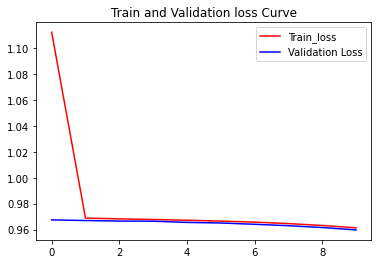

In [25]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(train_loss, color='r', label='Train_loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation loss Curve")
plt.legend()
plt.show()

In [26]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 15)        150015      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 15)        801375      input_2[0][0]                    
______________________________________________________________________________________________

In [29]:
book_em = model.get_layer('embedding')
book_em_weights = book_em.get_weights()[0]
book_em_weights.shape

(10001, 15)

In [35]:
b_id = list(rating_df.book_id.unique())

In [52]:
book_arr = np.array(b_id)
user = np.array([1 for i in range(len(b_id))])
pred = model.predict([book_arr,user])
pred

array([[3.8164344],
       [3.786265 ],
       [3.7639627],
       ...,
       [3.7706094],
       [3.7497668],
       [3.740224 ]], dtype=float32)

In [53]:
pred = pred.reshape(-1)
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([ 975, 1903, 5783, 9482,  141])

In [54]:
books_df.iloc[pred_ids]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
975,976,90072,90072,24501333,3,793551617,9.780794e+12,"Robert Kapilow, Dr. Seuss",NaN,NaN,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",NaN,4.44,90574,90691,262,803,1943,10781,20483,56681,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1903,1904,18310944,18310944,27097530,13,1401248969,9.781401e+12,"Neil Gaiman, J.H. Williams III, Dave Stewart, ...",2015.0,The Sandman: Overture,The Sandman: Overture,en-US,3.94,52973,53412,1043,4360,3419,8193,12325,25115,https://images.gr-assets.com/books/1444878181m...,https://images.gr-assets.com/books/1444878181s...
5783,5784,1662160,1662160,1656975,35,375424474,9.780375e+12,Neil Shubin,2008.0,Your Inner Fish: A Journey into the 3.5-Billio...,Your Inner Fish: A Journey into the 3.5-Billio...,NaN,3.97,14784,16284,1130,394,916,3200,6052,5722,https://images.gr-assets.com/books/1320439515m...,https://images.gr-assets.com/books/1320439515s...
9482,9483,77866,77866,2237564,47,1400031001,9.781400e+12,William Boyd,2002.0,Any Human Heart,Any Human Heart,en-GB,4.26,8365,10207,1045,94,335,1298,3615,4865,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
141,142,5043,5043,3359698,255,451207149,9.780451e+12,Ken Follett,1989.0,The Pillars of the Earth,The Pillars of the Earth (The Kingsbridge Seri...,eng,4.29,462517,495893,26283,9248,16886,57825,148052,263882,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
